# Lab 6: Transformations and Linear Regression

## Objectives

- Use tranformations to linearize the data.
- Fit a linear regression model to the transformed data.
- Make a predictions using your model.

## Dataset

For this lab, we will be using synthetic data for house size (sq ft) and house price (thousands of dollars). You can download it [here](https://drive.google.com/uc?export=download&id=1LhiiA2_Rcu6DVqbMwMQY9Cfj92VFiJJ8). In the csv, there are 2 columns: `Size` and `Price`.

### 1. Load Data and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('data.csv')
print("First 5 rows of the generated data:")
print(data.head())

First 5 rows of the generated data:
          Size     Price
0  1347.930231  2.368646
1  2507.146699  5.132354
2  3635.544361  7.982506
3  2642.351537  5.815469
4  2060.411328  3.595922


### 2. Explore the Data

- Plot `Size` vs `Price`.

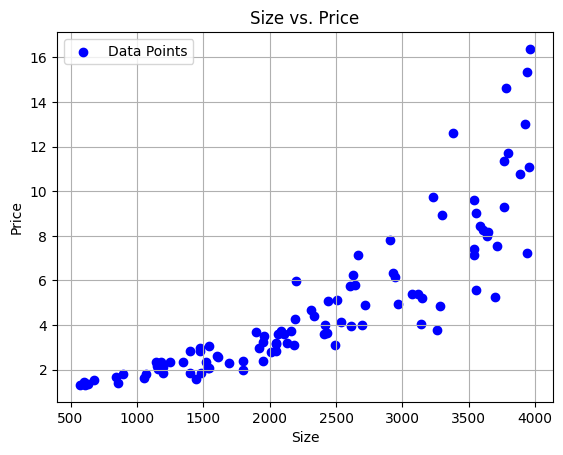

In [2]:
size = data['Size'].to_numpy()
price = data['Price'].to_numpy()
plt.scatter(size, price, color='blue', label='Data Points')
plt.title('Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### 3. Transform the Data

- Find transformations to linearize the data.
- Apply transformations.
- Plot the transformed data.

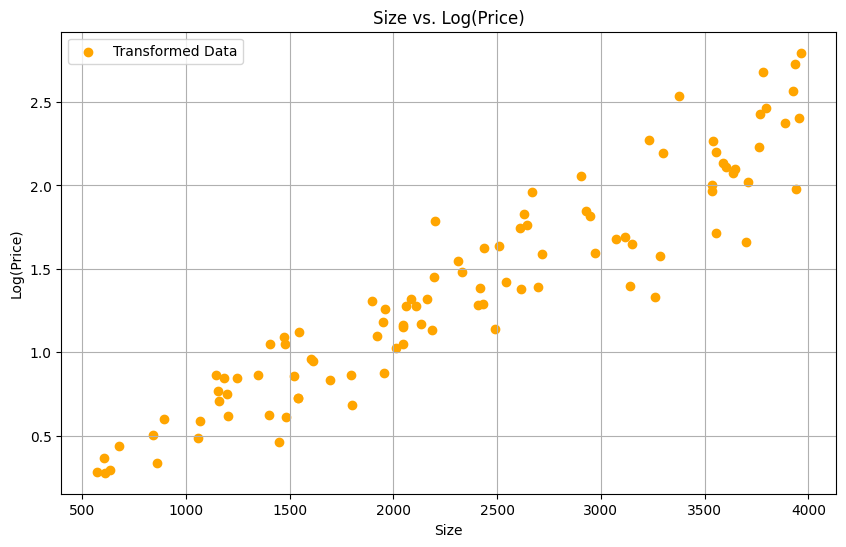

In [3]:
data['Log_Price'] = np.log(data['Price'])

plt.figure(figsize=(10, 6))
plt.scatter(data['Size'], data['Log_Price'], color='orange', label='Transformed Data')
plt.title('Size vs. Log(Price)')
plt.xlabel('Size')
plt.ylabel('Log(Price)')
plt.legend()
plt.grid(True)
plt.show()

### 4. Fit Linear Model

- Fit the regression model to transformed data.
- Report your obtained coefficients.

In [4]:
X = data[['Size']]
y = data['Log_Price']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### 5. Residuals

- Check the residuals for to verify that transformations were helpful by creating a plot with the residuals on the y-axis and the predicted values on the x-axis.

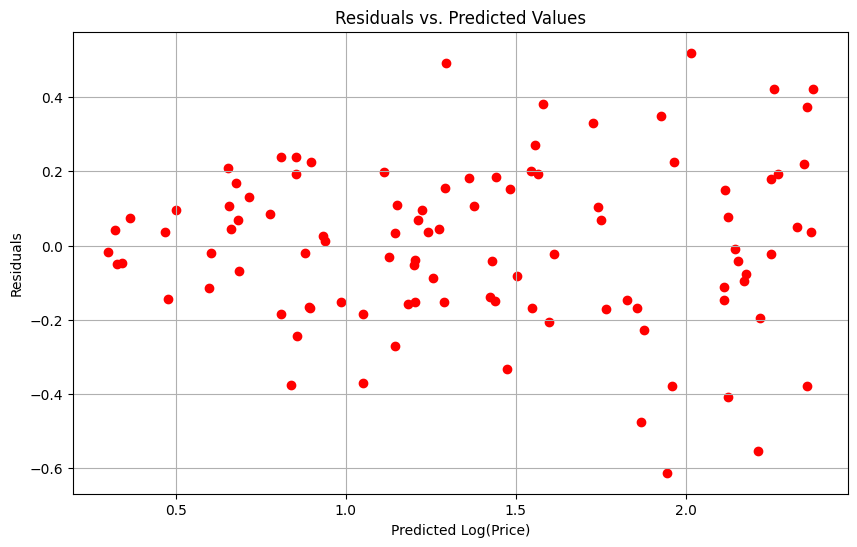

In [12]:
predicted_log_price = model.predict(X)

residuals = y - predicted_log_price

plt.figure(figsize=(10, 6))
plt.scatter(predicted_log_price, residuals, color='red')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Log(Price)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### 6. Predict

- Predict the price for a 2500 sq ft house.
- Convert prediction back to original scale (it is currently in the transformed scale).

In [11]:
size_to_predict = np.array([[2500]])
predicted_log_price = model.predict(size_to_predict)

predicted_price = np.exp(predicted_log_price[0]) 

print(f"The predicted price for a 2500 sq ft house is: ${predicted_price:,.2f}")

The predicted price for a 2500 sq ft house is: $4.39


C:\Users\kinga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 7. Submit Results

- Show your code cell outputs and your plots to the TA